In [5]:
# Here's arc 2, 810b9661

In [6]:
%matplotlib inline
import sys
import os

# imports from other file.
import json
import numpy as np
import re

import numpy as np
import matplotlib.pyplot as plt

# https://scikit-image.org/docs/stable/user_guide/getting_started.html
import skimage
from skimage.morphology import rectangle, flood_fill

# https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
sys.path.insert(0, '/home/sjeffery/Documents/arc/ARC/src')
print (sys.path)
import manual_solve as arc

['/home/sjeffery/Documents/arc/ARC/src', '/home/sjeffery/Documents/arc/ARC/data', '/home/sjeffery/anaconda3/lib/python37.zip', '/home/sjeffery/anaconda3/lib/python3.7', '/home/sjeffery/anaconda3/lib/python3.7/lib-dynload', '', '/home/sjeffery/anaconda3/lib/python3.7/site-packages', '/home/sjeffery/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/sjeffery/.ipython']


In [7]:
def read_arc(data):
    # Extract the train/test input/output grids. Each grid will be a
    # list of lists of ints. We convert to Numpy.
    train_input = [np.array(data['train'][i]['input']) for i in range(len(data['train']))]
    train_output = [np.array(data['train'][i]['output']) for i in range(len(data['train']))]
    test_input = [np.array(data['test'][i]['input']) for i in range(len(data['test']))]
    test_output = [np.array(data['test'][i]['output']) for i in range(len(data['test']))]

    return (train_input, train_output, test_input, test_output)

In [8]:
PATH = r'/home/sjeffery/Documents/arc/ARC/data/training/'
%cd /home/sjeffery/Documents/arc/ARC/data/training/
# arc_file = '810b9b61.json'

/home/sjeffery/Documents/arc/ARC/data/training


In [25]:
ID = '810b9b61'
# directory = os.path.join("..", "data", "training")
json_filename = os.path.join(PATH, ID + ".json")
data = arc.read_ARC_JSON(json_filename)

train_input, train_output, test_input, test_output = data

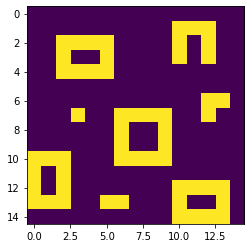

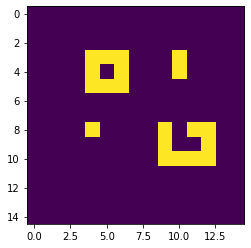

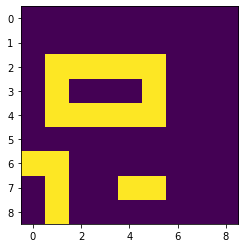

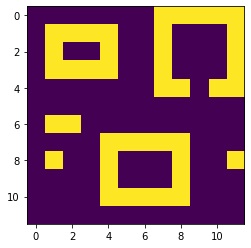

In [27]:
def plot_array (A):
    for t_ in range (len(A)):
        plt.figure(t_)
        plt.imshow(A[t_])
        
plot_array (train_input)

plt.figure()
plt.imshow(test_input[0])

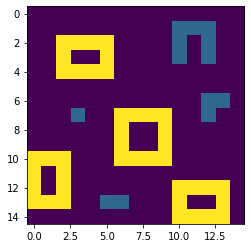

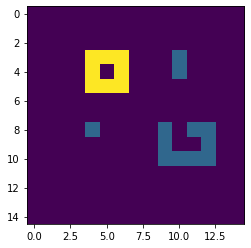

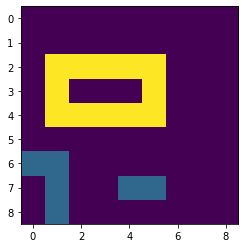

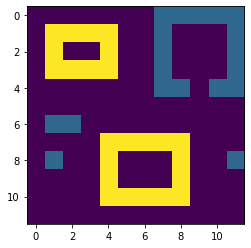

In [28]:
plot_array(train_output)

plt.figure()
plt.imshow(test_output[0])

# Run upto this point to inport the data

In [35]:
# Here we select the grid we are going to complete the transformations on, train_input [i] for i in domain [0,2]
# As we're building multipurpose functions selcting zero here generally OK.

def rows_cols (A):
    rows, cols = A.shape[0], A.shape[1]
    return rows, cols

rows_cols (train_input[0])

(15, 15)

In [32]:
rec2_4 = rectangle(2,4)
rec2_4 * 2

array([[2, 2, 2, 2],
       [2, 2, 2, 2]], dtype=uint8)

In [35]:
target = np.ones((10,10))
target

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [30]:
train = train_input[2]
train

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [31]:
# test the label function.
skimage.measure.label(train)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 3, 3, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0]])

In [32]:
train[(2,2)]

1

In [33]:
# find a background 0 element.
def select_bckgrd_seed_pt(A):
    """
    Takes the array like A, and selects a background point having an array entry of zero
    returns the tuple of (r, c) of this point which we use to seed a flood fill.
    """
    seed_pt = ()
    for col in range(A.shape[1]):
        for row in range(A.shape[0]):
            if A[(row,col)] == 0:
                seed_pt = (row,col)
                print (f'Seed point = ({row} , {col})')
                return seed_pt
    
    if seed_pt == ():
        raise ValueError ('Opps, we have a problem trying to find the seed point')

seed_pt = select_bckgrd_seed_pt (train)
seed_pt

Seed point = (0 , 0)


(0, 0)

In [65]:
mask = flood_fill(train, seed_pt, new_value = 2)
mask

# Check for edge cases where fill can't fill due to closed by edge.
r_mask,c_mask = mask.shape
closed_points = np.where (mask == 0)
closed_coords = list(zip(closed_points[0], closed_points[1]))
closed_coords = [(r,c) for (r, c) in closed_coords if (c == 0 or c == c_mask or r == r_mask or r == 0)]
# it would be better to create fills at each of these potential points and merge them, but this works
# for our specific set.
for (r,c) in closed_coords:
    mask[r,c] = 2

    

In [51]:
# (r != 0 or r != r_mask or c != 0 or c!= c_mask)
mask

array([[2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 1, 1, 1, 1, 1, 2, 2, 2],
       [2, 1, 0, 0, 0, 1, 2, 2, 2],
       [2, 1, 1, 1, 1, 1, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 2, 2, 2, 2, 2, 2, 2],
       [0, 1, 2, 2, 1, 1, 2, 2, 2],
       [0, 1, 2, 2, 2, 2, 2, 2, 2]])

In [66]:
mask_label, n_labels = skimage.measure.label(mask, return_num = True)
mask_label, n_labels

(array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1],
        [1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1],
        [1, 1, 3, 0, 0, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1],
        [1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1],
        [1, 1, 1, 5, 1, 1, 6, 6, 6, 6, 1, 1, 4, 1, 1],
        [1, 1, 1, 1, 1, 1, 6, 0, 0, 6, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 6, 0, 0, 6, 1, 1, 1, 1, 1],
        [7, 7, 7, 1, 1, 1, 6, 6, 6, 6, 1, 1, 1, 1, 1],
        [7, 0, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [7, 0, 7, 1, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 1],
        [7, 7, 7, 1, 1, 9, 9, 1, 1, 1, 8, 0, 0, 8, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 1]]),
 9)

In [73]:
# loop over the labels [2, n_label) excluding the closed and background labels.
# pick out labels where the points are adjacent to 0 labels
res_row, res_col = np.where(mask_label == 0)
# set these to true on the mask.
res_row, res_col

(array([ 3,  3,  8,  8,  9,  9, 11, 12, 13, 13]),
 array([ 3,  4,  7,  8,  7,  8,  1,  1, 11, 12]))

In [74]:
coords = list(zip(res_row, res_col))
coords

[(3, 3),
 (3, 4),
 (8, 7),
 (8, 8),
 (9, 7),
 (9, 8),
 (11, 1),
 (12, 1),
 (13, 11),
 (13, 12)]

In [80]:
def points_from_region(A, region = 0):
    """
    argumments are A an array like region with area labels.
    region, is the label number, usually a integer value.
    return the list of points (r,c) for each point in the region.
    """
    res_row, res_col = np.where(A == region)
    return list(zip(res_row, res_col))


In [84]:
def is_adjacent (p1,p2):
    """
    Takes two points and checks to see if they are adjacent.
    returns true if they are adacent and false otherwise.
    p1 and p2 are tuples of (r, c) or (x, y) coordinates, but should both use the same coordinate system.
    
    >>> is_adjacent ((3,3), (4,4))
    True
    
    >>> is_adjacent ((3,3), (3,5))
    False
    
    """
    x1, y1 = p1 
    x2, y2 = p2
    
    return (abs(x1-x2) <= 1) and (abs(y1-y2)<=1)

is_adjacent ((3,3), (4,4))

True

In [78]:
closed_points = points_from_region(mask_label)

In [87]:
test_points = points_from_region(mask_label, region = 4)

In [88]:
if is_adjacent(test_points[0], closed_points[0]):
    print ('this is a close region')

In [162]:
def select_closed(A, c, n_labels):
    """
    A is the array of region labels
    c is the label for the close points
    n_labels are the number of labels in A
    
    
    """
    selected = []
    closed_points = points_from_region(A, c)
    
    for region in range(2, n_labels):
        test_point = points_from_region(mask_label, region = region)[0] # just one test point is sufficient.
        
        for c_pt in closed_points:
            # print (test_point, c_pt)
            if is_adjacent(test_point, c_pt):
                selected.append(region)
    
    return selected

select_closed(mask_label, 0, n_labels)

[3, 6, 7, 8]

In [143]:
train

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]])

In [147]:
# now we can select points from the selected regions and change colour to 4 which should be green.
# all other points remain unchanged.

target = train.copy()
color = 3

for idx, sel in enumerate(select_closed(mask_label, 0)):
    print (idx, sel)
    change_col = mask_label * (mask_label == sel) * color/sel
    np.place (change_col, change_col == 0, [1]) 
    print (change_col)
    target = target * change_col

target

0 3
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
1 6
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 3., 3., 3., 3., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 3., 0., 0., 3., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 3., 3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 0., 3., 3., 3., 3., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 0., 3., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 0., 3., 0., 0., 0., 0., 0.],
       [3., 3., 3., 0., 0., 0., 3., 3., 3., 3., 0., 0., 0., 0., 0.],
       [3., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 3., 0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 3., 0.],
       [3., 3., 3., 0., 0., 1., 1., 0., 0., 0., 3., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [115]:
import numpy.ma as ma
mx = ma.masked_array(mask_label, mask = ~(mask_label == 3))
mx

masked_array(
  data=[[--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, 3, 3, 3, 3, --, --, --, --, --, --, --, --, --],
        [--, --, 3, --, --, 3, --, --, --, --, --, --, --, --, --],
        [--, --, 3, 3, 3, 3, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --,

In [125]:
cA = mask_label * (mask_label == 3) / 3 * 3 # final three is the colour to replace.
cA

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 4., 4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 4., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 4., 4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

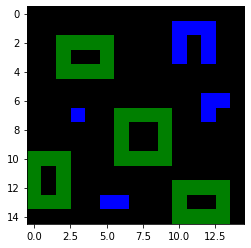

In [165]:
from matplotlib import colors
cmap = colors.ListedColormap(['k','b','y','r','g'])
plt.figure()
plt.imshow(target, cmap = cmap)

## The refactored function.

In [76]:
def solve_810b9b61(x):
    """
    This program uses the skimage module to select and label regions & complete tranformations.
    
    Stephen Jeffery 21249306, Nov 2021    
    """
    # imports for numpy and skimage which we'll use to manipulate the image.
    import numpy as np
    import matplotlib.pyplot as plt

    # https://scikit-image.org/docs/stable/user_guide/getting_started.html
    import skimage
    from skimage.morphology import flood_fill
    
    def select_bckgrd_seed_pt(A):
        """
        Takes the array like A, and selects a background point having an array entry of zero
        returns the tuple of (r, c) of this point which we use to seed a flood fill.
        """
        seed_pt = ()
        for col in range(A.shape[1]):
            for row in range(A.shape[0]):
                if A[(row,col)] == 0:
                    seed_pt = (row,col)
                    # print (f'bckgrd seed point = ({row} , {col})')
                    return seed_pt

        if seed_pt == ():
            raise ValueError ('Opps, we have a problem trying to find the seed point')

        
        
    def points_from_region(A, region = 0):
        """
        argumments are A an array like region with area labels.
        region, is the label number, usually a integer value.
        return the list of points (r,c) for each point in the region.
        """
        res_row, res_col = np.where(A == region)
        return list(zip(res_row, res_col))
    
    
    def is_adjacent (p1,p2):
        """
        Takes two points and checks to see if they are adjacent.
        returns true if they are adacent and false otherwise.
        p1 and p2 are tuples of (r, c) or (x, y) coordinates, but should both use the same coordinate system.

        >>> is_adjacent ((3,3), (4,4))
        True

        >>> is_adjacent ((3,3), (3,5))
        False

        """
        x1, y1 = p1 
        x2, y2 = p2

        return (abs(x1-x2) <= 1) and (abs(y1-y2)<=1)


    def select_closed(A, c, n_labels):
        """
        A is the array of region labels
        c is the label for the close points
        n_labels are the number of labels in A


        """
        selected = []
        closed_points = points_from_region(A, c)

        for region in range(2, n_labels):
            test_point = points_from_region(mask_label, region = region)[0] # just one test point is sufficient.

            for c_pt in closed_points:
                # print (test_point, c_pt)
                if is_adjacent(test_point, c_pt):
                    selected.append(region)

        return selected



    ## Main program section.
    
    # get the seed point for the flood_fill, which is a background 0 point in the array.
    seed_pt = select_bckgrd_seed_pt (x)
    # print (f'seed point = {seed_pt}')
    
    # flood fill from the seed point, leaving the closed regions unchanged
    mask = flood_fill(x, seed_pt, new_value = 2)  # 2 = red.
    print (f' mask = {mask}')
    
    # Check for edge cases where fill can't fill due to closed by edge.
    r_mask,c_mask = mask.shape
    closed_points = np.where (mask == 0)
    closed_coords = list(zip(closed_points[0], closed_points[1]))
    closed_coords = [(r,c) for (r, c) in closed_coords if (c == 0 or c == c_mask or r == r_mask or r == 0)]
    # it would be better to create fills at each of these potential points and merge them, but this works
    # for our specific set.
    for (r,c) in closed_coords:
        mask[r,c] = 2
    
    # apply labels over each region to act as a mask for the individual items.
    # there are n_labels differetn regions in the array. background is zero.
    mask_label, n_labels = skimage.measure.label(mask, return_num = True)
    # print (f'mask labels generated for {n_labels} labels')
    
    # select the closed regions, closed regions are adjacent to the points that did not get flood filled.
    
    target = x.copy() # make a copy of the training array so we can keep unchanged elements
    color = 3  # select the color we want to change the closed shapes to.

    for sel in (select_closed(mask_label, 0, n_labels)): # loop over the closed shape labels.
        # overwrite each closed shape with the new color
        change_col = mask_label * (mask_label == sel) * color/sel  
        np.place (change_col, change_col == 0, [1]) 
        # print (change_col)
        target = target * change_col

    x = target
    return x

targetx = solve_810b9b61(test_input[0])  # select training arrays in domain [0,2]
targetx

 mask = [[2 2 2 2 2 2 2 1 1 1 1 1]
 [2 1 1 1 1 2 2 1 2 2 2 1]
 [2 1 0 0 1 2 2 1 2 2 2 1]
 [2 1 1 1 1 2 2 1 2 2 2 1]
 [2 2 2 2 2 2 2 1 1 2 1 1]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 1 1 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 1 1 1 1 1 2 2 2]
 [2 1 2 2 1 0 0 0 1 2 2 1]
 [2 2 2 2 1 0 0 0 1 2 2 2]
 [2 2 2 2 1 1 1 1 1 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]]


array([[0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 3., 3., 3., 3., 0., 0., 1., 0., 0., 0., 1.],
       [0., 3., 0., 0., 3., 0., 0., 1., 0., 0., 0., 1.],
       [0., 3., 3., 3., 3., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 3., 3., 3., 3., 0., 0., 0.],
       [0., 1., 0., 0., 3., 0., 0., 0., 3., 0., 0., 1.],
       [0., 0., 0., 0., 3., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 3., 3., 3., 3., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

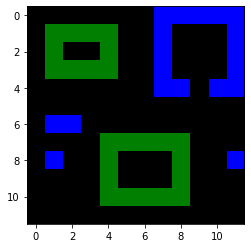

In [77]:
# Visualise the results
from matplotlib import colors
cmap = colors.ListedColormap(['k','b','y','r','g'])
plt.figure()
plt.imshow(targetx, cmap = cmap)

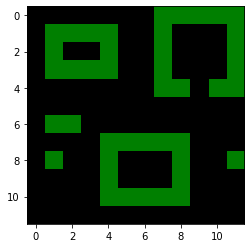

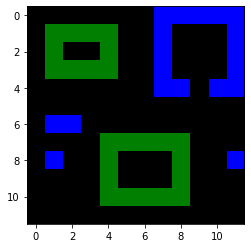

In [80]:
plt.figure()
plt.imshow(test_input[0], cmap = cmap)

plt.figure()
plt.imshow(test_output[0], cmap = cmap)

# Heres the code for 4347f46a, its just a single one line transformation.

In [188]:
# Heres the code for 4347f46a, its just a single one line transformation.

grid = np.zeros((10,10))

rec2_4 = rectangle(3,4)
rec2_4 = rec2_4 * 2
r, c = 1,1

grid[r: r + rec2_4.shape[0], c: c + rec2_4.shape[1]] = rec2_4
grid

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 2., 2., 2., 0., 0., 0., 0., 0.],
       [0., 2., 2., 2., 2., 0., 0., 0., 0., 0.],
       [0., 2., 2., 2., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [192]:
from skimage.segmentation import find_boundaries
# mask = find_boundaries(grid, mode = 'inner')
target = find_boundaries(grid, mode = 'inner') * grid
target

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 2., 2., 2., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 2., 2., 2., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])